# House Prices - Advanced Regression Techniques

**Predict sales prices and practice feature engineering, RFs, and gradient boosting**

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
houses = pd.read_csv("datasets/train.csv")

## 1 - Analise descritiva

In [94]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Dados duplicados

In [95]:
houses.duplicated().sum()

np.int64(0)

In [96]:
houses["Id"].unique()

array([   1,    2,    3, ..., 1458, 1459, 1460])

Coluna ID tem somente valores unicos, que não importam na analise

In [97]:
houses.drop("Id", axis=1, inplace=True)

#### Colunas categóricas

In [98]:
houses.describe(include='object').columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [99]:
houses.describe(include='object').T


,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


*Colunas com valores faltantes*

- Correlação: Media dos preoços de acordo com as variáveis categóricas. Os valores nulos serão transformados para "Missing"

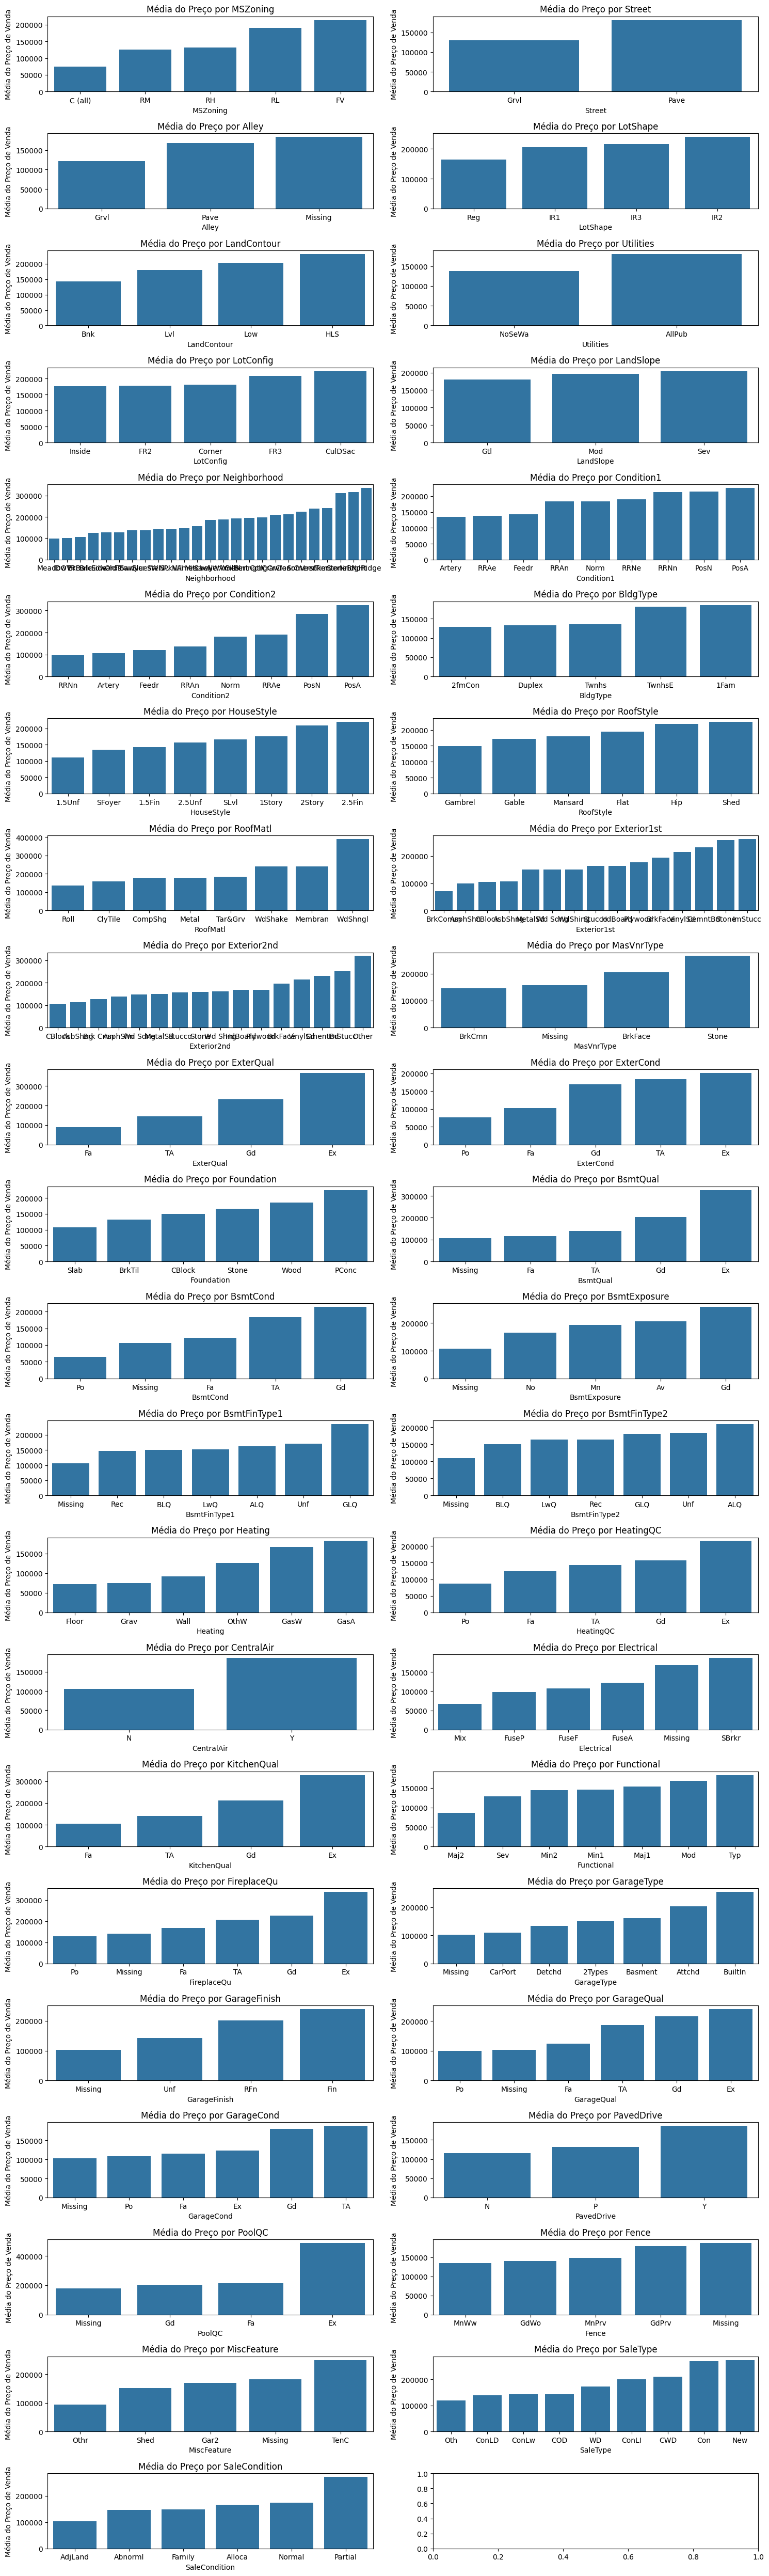

In [100]:
cols = houses.describe(include='object').columns

fig, axs = plt.subplots(nrows=22, ncols=2, figsize=(15, 50))
axs = axs.flatten()

for i, col in enumerate(cols):
    houses[col] = houses[col].fillna('Missing')

    mean = houses.groupby(col)['SalePrice'].mean().reset_index()
    mean = mean.sort_values("SalePrice")
    
    sns.barplot(x=col, y='SalePrice', data=mean, ax=axs[i])
    axs[i].set_title(f'Média do Preço por {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Média do Preço de Venda')

plt.tight_layout()
plt.show()


As variáveis categóricas apresentaram uma boa relação com preço

#### Colunas numericas

In [101]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [102]:
houses.describe(include=['float64', 'int64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [103]:
houses[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch']].notnull().sum()


LotFrontage      1201
LotArea          1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
MasVnrArea       1452
BsmtFinSF1       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
GrLivArea        1460
BsmtFullBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1460
KitchenAbvGr     1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageYrBlt      1379
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
ScreenPorch      1460
dtype: int64

- Tratamento de dados nulos: 
Numericas: LotFrontage, MasVnrArea, GarageYrBlt - Media dos valores
Categóricas: Colocamos todos os valores faltantes como missing (Uma nova categoria)

In [104]:
from sklearn.impute import SimpleImputer

imputerLotFrontage = SimpleImputer(strategy='mean')
houses['LotFrontage'] = imputerLotFrontage.fit_transform(houses[['LotFrontage']])

imputerMasVnrArea = SimpleImputer(strategy='mean')
houses['MasVnrArea'] = imputerMasVnrArea.fit_transform(houses[['MasVnrArea']])

imputerGarageYrBlt = SimpleImputer(strategy='mean')
houses['GarageYrBlt'] = imputerGarageYrBlt.fit_transform(houses[['GarageYrBlt']])

In [105]:
houses['GarageYrBlt'] = np.round(houses['GarageYrBlt']).astype("int")

- Outliers

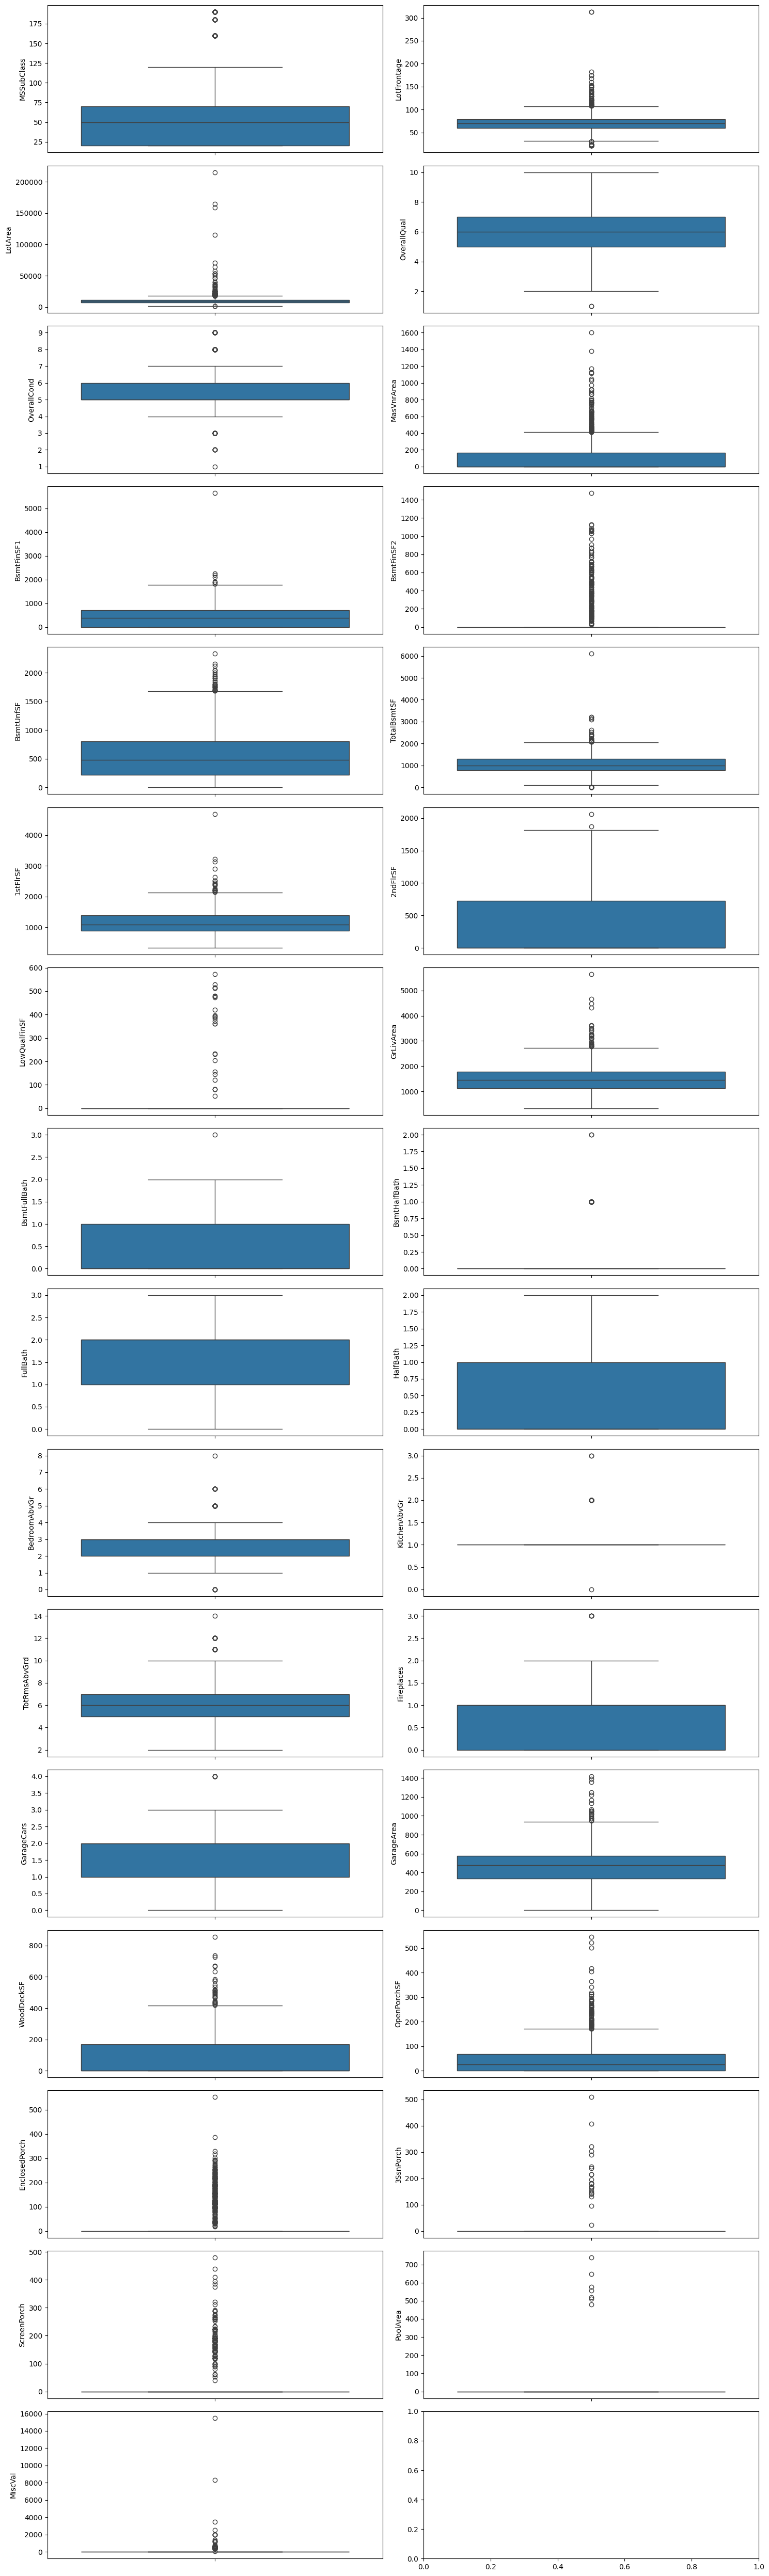

In [106]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

fig, axs = plt.subplots(nrows=16, ncols=2, figsize=(15, 50))
axs = axs.flatten()

for i, col in enumerate(cols): 
    sns.boxplot(houses[col], ax=axs[i])
plt.tight_layout()
plt.show()

As colunas PoolArea, ScreenPorch e EnclosedPorch tem na maioria valores nulos, para melhorar as colunas vamos trasnformar em booleano (0): Caso não possua e (1): Caso possua.

- Transformação das colunas ScreenPorch e EnclosedPorch para booleano

In [107]:
houses['ScreenPorch'] = (houses['ScreenPorch'] > 0).astype(int)
houses['EnclosedPorch'] = (houses['EnclosedPorch'] > 0).astype(int)
houses['PoolArea'] = (houses['PoolArea'] > 0).astype(int)


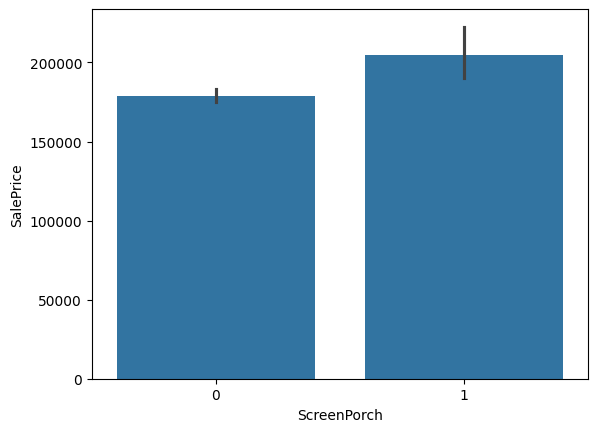

In [108]:
sns.barplot(houses, x="ScreenPorch", y="SalePrice")
plt.show()

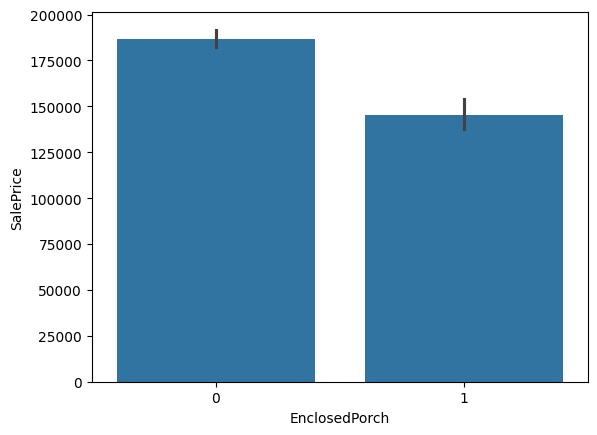

In [109]:
sns.barplot(houses, x="EnclosedPorch", y="SalePrice")
plt.show()

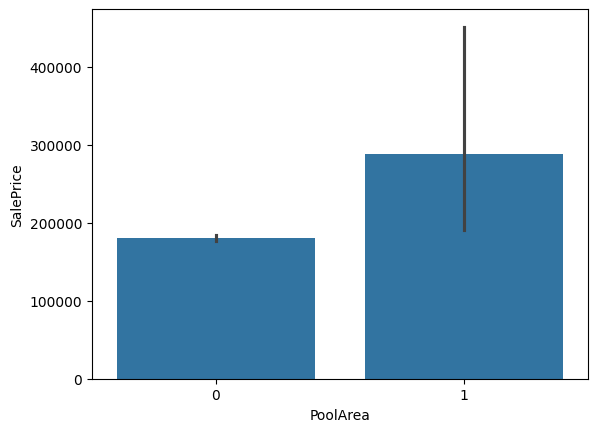

In [110]:
sns.barplot(houses, x="PoolArea", y="SalePrice")
plt.show()

- Colunas de data

In [111]:
houses["YearBuilt"] = pd.to_datetime(houses["YearBuilt"], format="%Y").dt.year
houses["YearRemodAdd"] = pd.to_datetime(houses["YearRemodAdd"], format="%Y").dt.year
houses["GarageYrBlt"] = pd.to_datetime(houses["GarageYrBlt"], format="%Y").dt.year
houses["MoSold"] = pd.to_datetime(houses["MoSold"], format="%m").dt.month
houses["YrSold"] = pd.to_datetime(houses["YrSold"], format="%Y").dt.year


In [112]:
houses[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']]


,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003,2,2008
1,1976,1976,1976,5,2007
2,2001,2002,2001,9,2008
3,1915,1970,1998,2,2006
4,2000,2000,2000,12,2008
...,...,...,...,...,...
1455,1999,2000,1999,8,2007
1456,1978,1988,1978,2,2010
1457,1941,2006,1941,5,2010
1458,1950,1996,1950,4,2010


- Criando coluna com a data da venda

In [113]:
houses['DateSold'] = pd.to_datetime(houses['YrSold'].astype(str) + '-' + houses['MoSold'].astype(str), format="%Y-%m")

Novas Features
- Age = YrSold - YearBuilt
- TimeSinceRemodel = YrSold - YearRemodAdd
- GarageAge = YrSold - GarageYrBlt
- BathPerBedroom = (FullBath + HalfBath) / Bedroom

In [114]:
houses['Age'] = houses["YrSold"] - houses["YearBuilt"]

In [115]:
houses['TimeSinceRemodel'] = houses["YrSold"] - houses["YearRemodAdd"]

In [116]:
houses['GarageAge'] = houses["YrSold"] - houses["GarageYrBlt"]


In [117]:
houses["BathPerBedroom"] = (houses["FullBath"] + houses["HalfBath"]) / houses["BedroomAbvGr"]

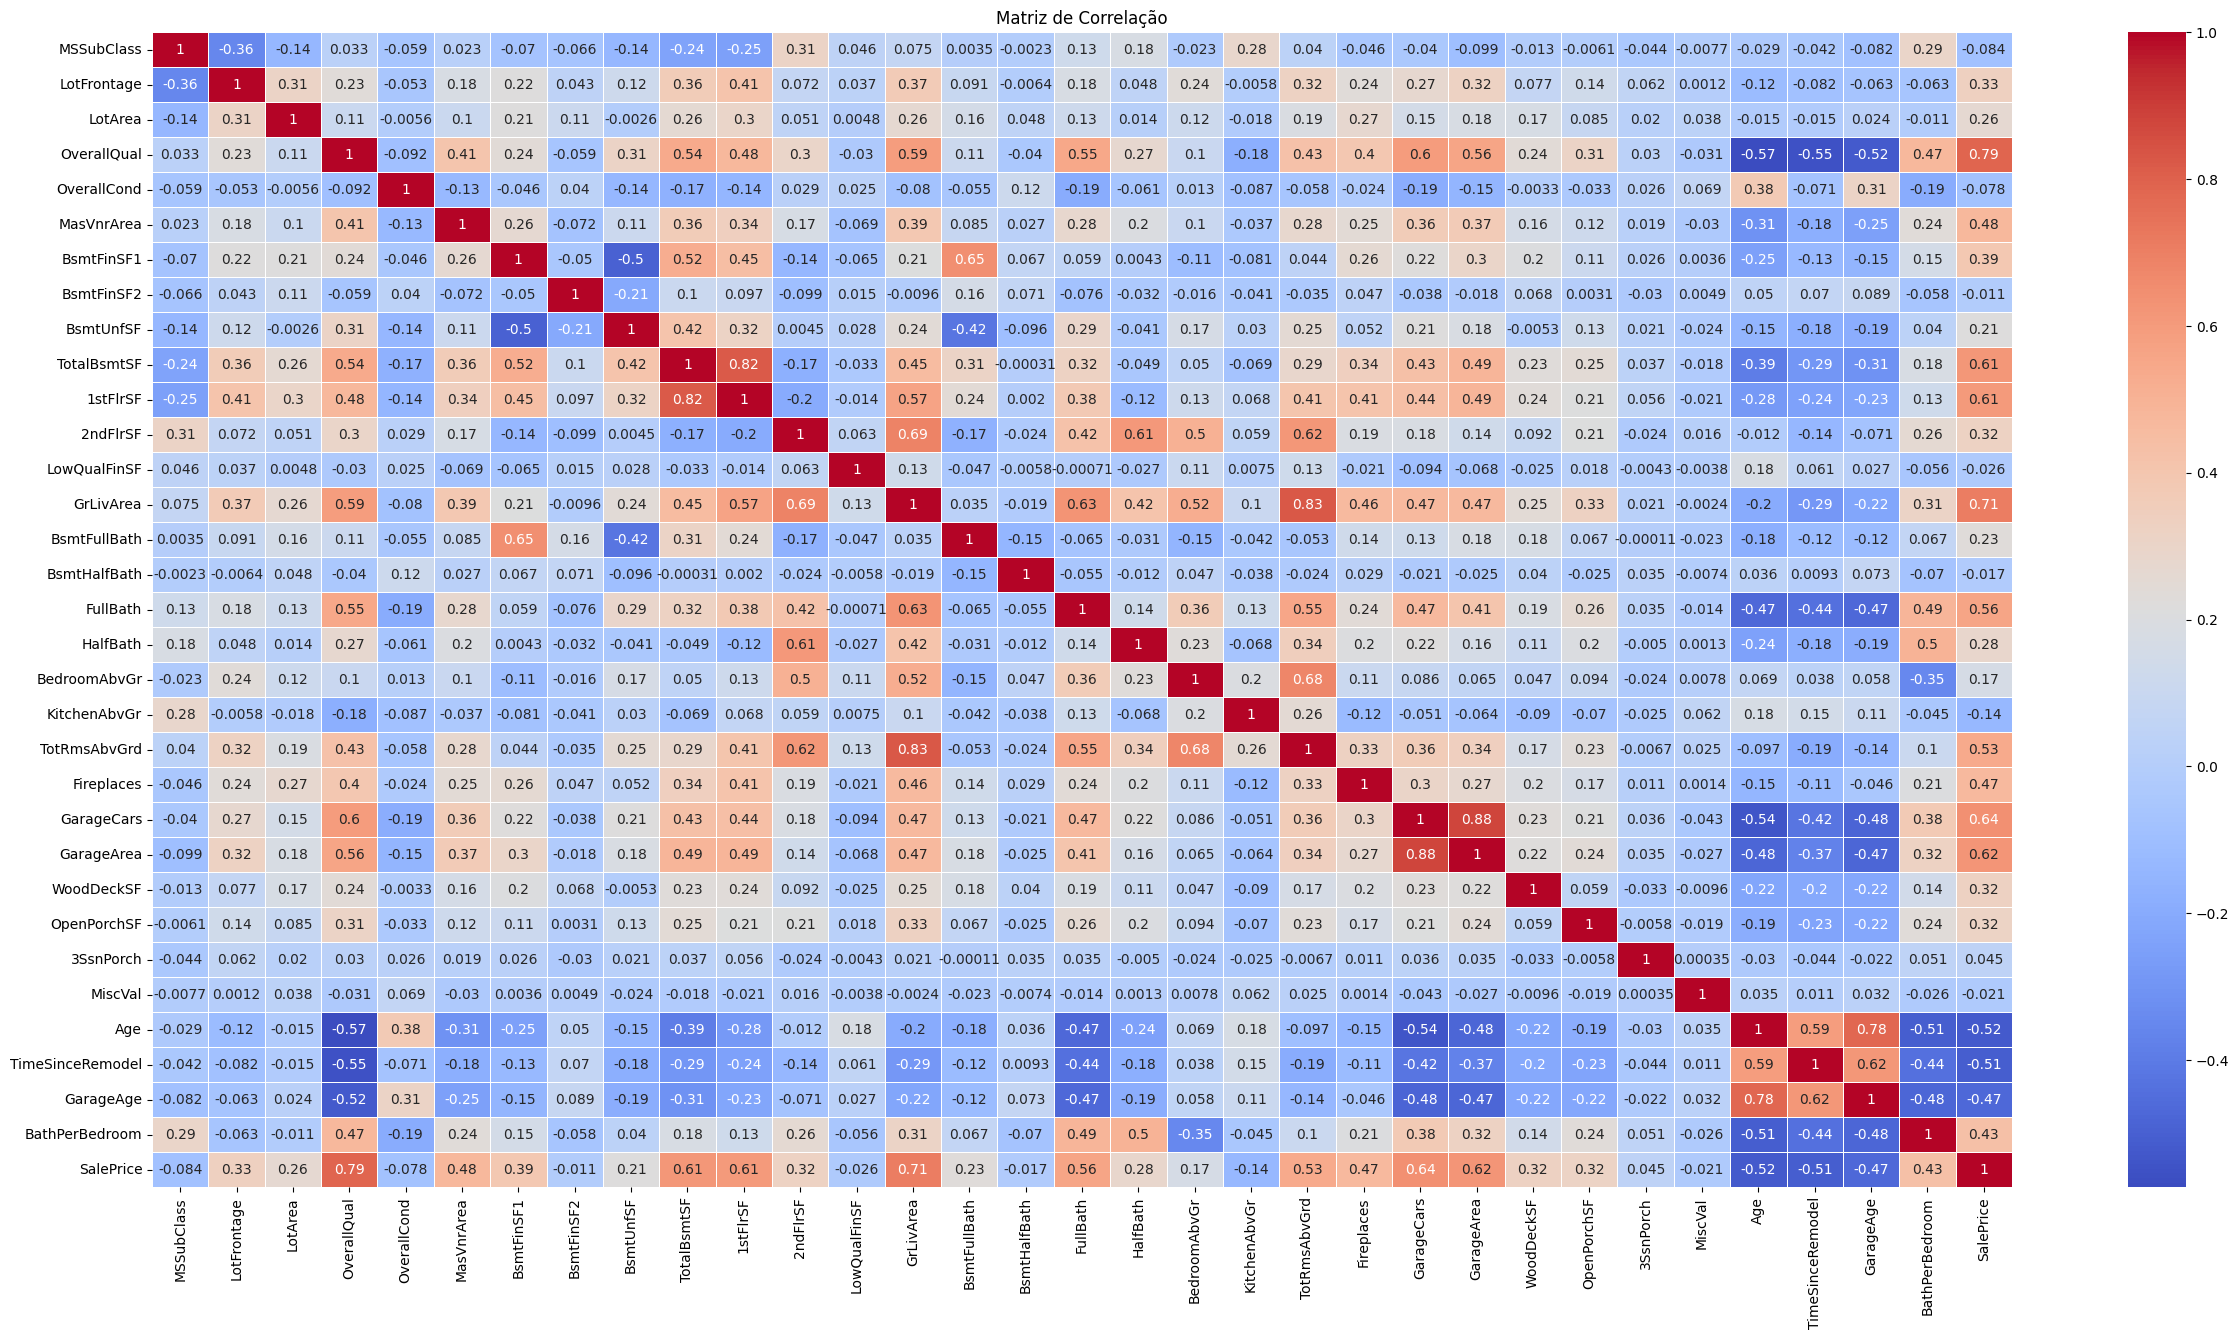

In [118]:
correlation_matrix = houses[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       '3SsnPorch', 'MiscVal', 'Age', 'TimeSinceRemodel', 'GarageAge', 'BathPerBedroom', 'SalePrice']].corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Variáveis que tem pouca correlação: ['MSSubClass', 'BsmtFinSF2',
       'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal']

### Pré-processamento

- Divisão do dataset

In [119]:
from sklearn.model_selection import train_test_split

X = houses[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       '3SsnPorch', 'MiscVal', 'Age', 'TimeSinceRemodel', 'GarageAge', 'BathPerBedroom',
         'PoolArea', 'ScreenPorch', 'EnclosedPorch', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]
y = houses["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

### Treinamento

#### Função de avaliação

In [120]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def evaluate_model(y_pred, y_test):
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')

#### Pipelines

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [122]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'MiscVal', 'Age', 'TimeSinceRemodel',
       'GarageAge', 'BathPerBedroom', 'PoolArea', 'ScreenPorch',
       'EnclosedPorch', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'Kitchen

In [123]:
num = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'MiscVal']



cat = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

#### XGBoost

In [124]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat),
        ('num', StandardScaler(), num)
    ]
)   

In [125]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', XGBRegressor())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQu...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [126]:
y_pred = pipe.predict(X_test)
evaluate_model(y_pred, y_test)

Mean Absolute Error (MAE): 18447.677520333906
Root Mean Squared Error (RMSE): 28345.540938139085
R-squared (R²): 0.8758215308189392


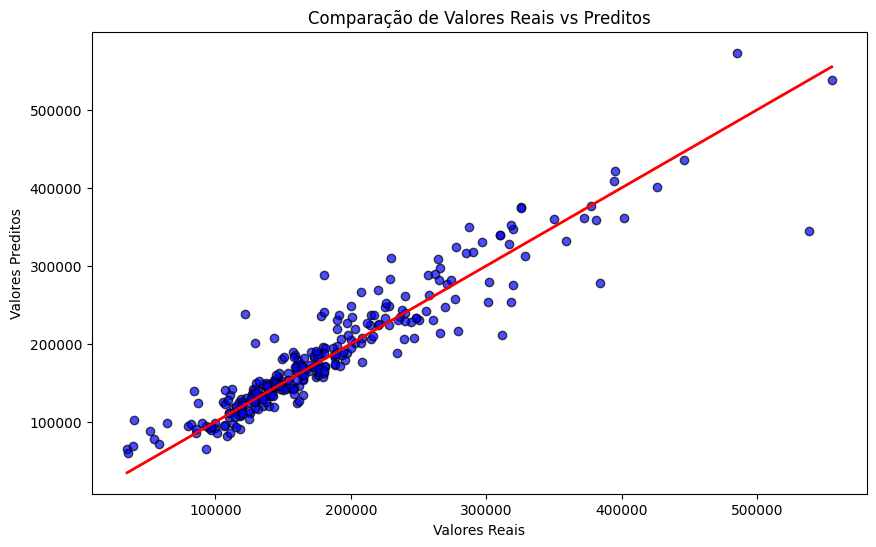

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Linha ideal de y_test = y_pred
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Valores Reais vs Preditos')
plt.show()

#### Random Forest

In [128]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), cat),
        ('num', MinMaxScaler(), num)
    ]
)   

In [129]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestRegressor())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQ...
                                                   'OverallQual', 'OverallCond',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   '3SsnPorch', 'MiscVal'])])),
                ('clf', RandomForestRegressor())])

In [130]:
y_pred = pipe.predict(X_test)
evaluate_model(y_pred, y_test)

Mean Absolute Error (MAE): 17646.77643835616
Root Mean Squared Error (RMSE): 27418.619489452303
R-squared (R²): 0.8838102117467824


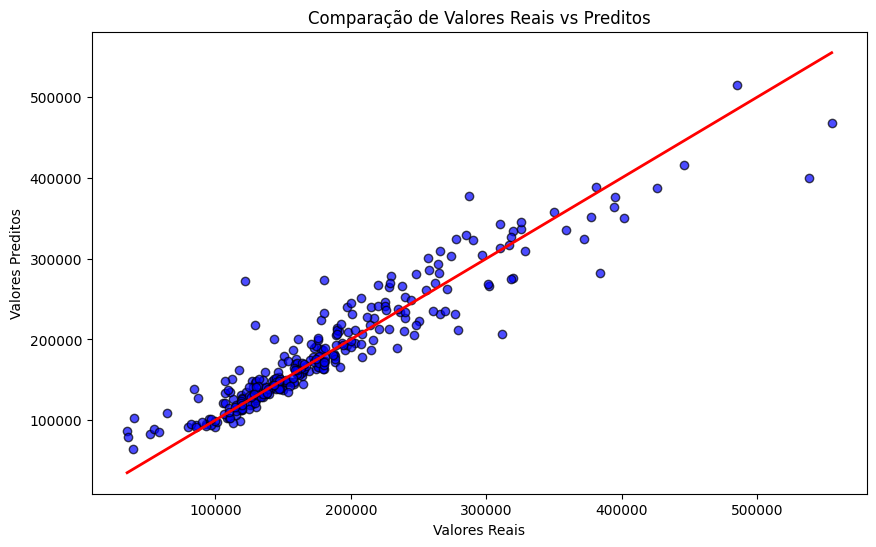

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Linha ideal de y_test = y_pred
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Valores Reais vs Preditos')
plt.show()
